## 1. Default Dataset   


In [1]:
import pandas as pd  
import numpy as np
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r'Default.csv')
df.shape

(10000, 4)

In [3]:
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [4]:
## frequency distribution of 'default' and 'student' columns?

In [5]:
df_default_no = df[df['default'] == 'No'].sample(frac = .10) ## 10% samples when default is no
df_default_yes = df[df['default'] == 'Yes']

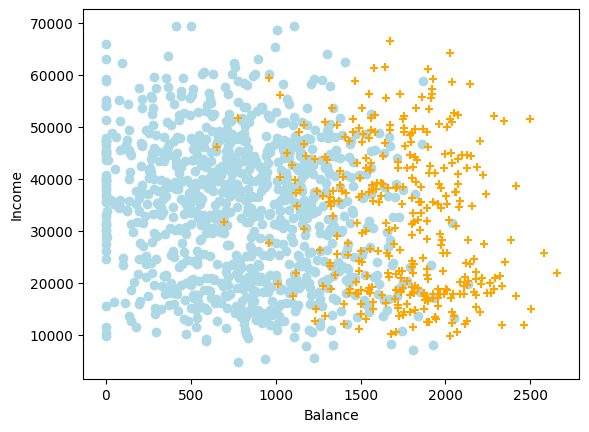

In [6]:
## Plot of Balance vs Income for each classes


In [7]:
balance_yes = df[df['default'] == 'Yes']['balance'].tolist()
balance_no = df[df['default'] == 'No']['balance'].tolist()
income_yes = df[df['default'] == 'Yes']['income'].tolist()
income_no = df[df['default'] == 'No']['income'].tolist()
tick_labels= ['No', 'Yes']
colors = ['lightblue', 'orange']

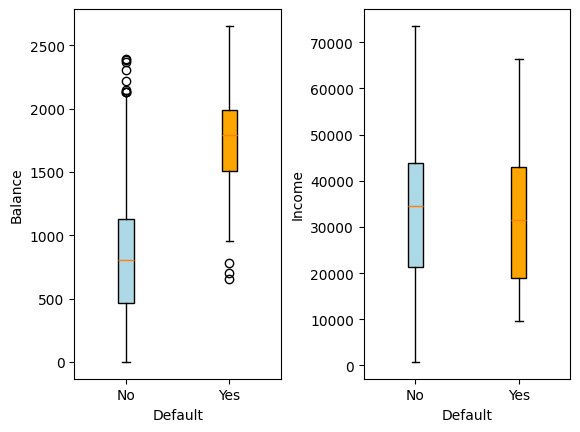

In [8]:
fig, ax = plt.subplots(1, 2)
bplot = ax[0].boxplot([balance_no, balance_yes], labels=tick_labels, patch_artist=True)
# fill with colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
ax[0].set_xlabel('Default')
ax[0].set_ylabel('Balance')
bplot = ax[1].boxplot([income_no, income_yes], labels=tick_labels, patch_artist=True)
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
ax[1].set_xlabel('Default')
ax[1].set_ylabel('Income')
fig.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

## 2. Logistic Regression  
- p(balance) = Probability (default = Yes | balance) = $\beta_0 + \beta_1 * balance$
- More general p(X) = $\beta_0 + \beta_1 * X$. 

In [11]:
# Factorize the categorical variables


In [12]:
from sklearn.linear_model import LinearRegression
X = df['balance'].array.reshape(-1, 1)
model = LinearRegression()
model.fit(X, df['default'])

LinearRegression()

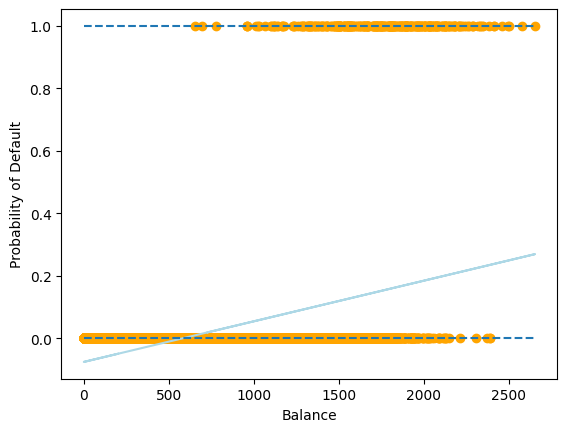

In [13]:
plt.scatter(df['balance'], df['default'], color = 'orange')
plt.plot(df['balance'], model.predict(X), color='lightblue')
plt.hlines(1, df['balance'].min(), df['balance'].max(), linestyles = 'dashed')
plt.hlines(0, df['balance'].min(), df['balance'].max(), linestyles = 'dashed')
plt.xlabel('Balance')
plt.ylabel('Probability of Default')
plt.show()

- For balances close to zero we predict a negative probability of default, which is not sensible.
- For large balances, we would get probability greater than 1.
- Probability of default should fall between 0 and 1.
- We should find a function which will always evaluate right side of the equation between 0 and 1.
- One such function is logistic function (sigmoid) function. $\sigma(x) = \frac{e^x}{1 + e^x}$ 

In [ ]:
## plot the sigmoid function

- Always lies between 0 and 1.
- $\sigma(0) = \frac{1}{2}$
- Hence $p(X) = \frac{e^{\beta_0 + \beta_1 X}}{1 + e^{\beta_0 + \beta_1 X}}$
- After a bit of manipulation $\frac{p(X)}{1 - p(X)} = e^{\beta_0 + \beta_1 X}$
- The quantity $\frac{p}{1-p}$ is called `odds (odds ratio)`
- Taking log of both sides in point 4 gives ........$log(\frac{p(X)}{1 - p(X)}) = \beta_0 + \beta_1 X$
- Left hand side is called `log odds` or `logit`
- Parameters are estimated by maximizing likelihood  

In [14]:
clf = LogisticRegression(solver='newton-cg')
clf.fit(X,df['default'])
print(clf)
print('classes: ',clf.classes_)
print('coefficients: ',clf.coef_)
print('intercept :', clf.intercept_)

LogisticRegression(solver='newton-cg')
classes:  [0 1]
coefficients:  [[0.00549892]]
intercept : [-10.65133018]


D:\Python\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\Python\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


In [15]:
## Using Statsmodels library
X_train = sm.add_constant(df['balance'])
model = sm.Logit(df['default'], X_train).fit()
print(model.summary2().tables[1])

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10
             Coef.  Std.Err.          z          P>|z|     [0.025    0.975]
const   -10.651331  0.361169 -29.491287  3.723665e-191 -11.359208 -9.943453
balance   0.005499  0.000220  24.952404  2.010855e-137   0.005067  0.005931


In [ ]:
## what is the prediction when balance = 1, 10, 100 & 1000$ and does it make sense?


In [16]:
## Using 'Student' variable
X_train = sm.add_constant(df['student'])
model = sm.Logit(df['default'], X_train).fit()
print(model.summary2().tables[1])

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7
            Coef.  Std.Err.          z     P>|z|    [0.025    0.975]
const   -3.504128  0.070713 -49.554094  0.000000 -3.642723 -3.365532
student  0.404887  0.115019   3.520177  0.000431  0.179454  0.630320


In [17]:
## Prediction when the person is student or not?


## 3. Multiple Logistic Regression   
- $log(\frac{p(X)}{1 - p(X)}) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p$

In [18]:
X_train = sm.add_constant(df[['balance', 'income', 'student']])
model = sm.Logit(df['default'], X_train).fit()
model.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-10.869045,0.492273,-22.079320,4.995499e-108,-11.833882,-9.904209
balance,0.005737,0.000232,24.736506,4.331521e-135,0.005282,0.006191
income,0.000003,0.000008,0.369808,7.115254e-01,-0.000013,0.000019
student,-0.646776,0.236257,-2.737595,6.189022e-03,-1.109831,-0.183721


- There is surprising outcome regarding coef of student

In [19]:
pd.crosstab(df['student'], df['default'])

default,0,1
student,,
0,6850,206
1,2817,127


In [20]:
df1 = df[df['student'] == 1]
df2 = df[df['student'] == 0]

In [21]:
model1 = LogisticRegression(solver = 'newton-cg')
model1.fit(df1['balance'].values.reshape(-1, 1), df1['default'])
model2 = LogisticRegression(solver = 'newton-cg')
model2.fit(df2['balance'].values.reshape(-1, 1), df2['default'])

LogisticRegression(solver='newton-cg')

In [22]:
test_balance = np.linspace(df['balance'].min(), df['balance'].max(), 1000).reshape(-1, 1)
pred_stud_yes = model1.predict_proba(test_balance)[:, 1]
pred_stud_no = model2.predict_proba(test_balance)[:, 1]

Text(0, 0.5, 'Credit Card Balance')

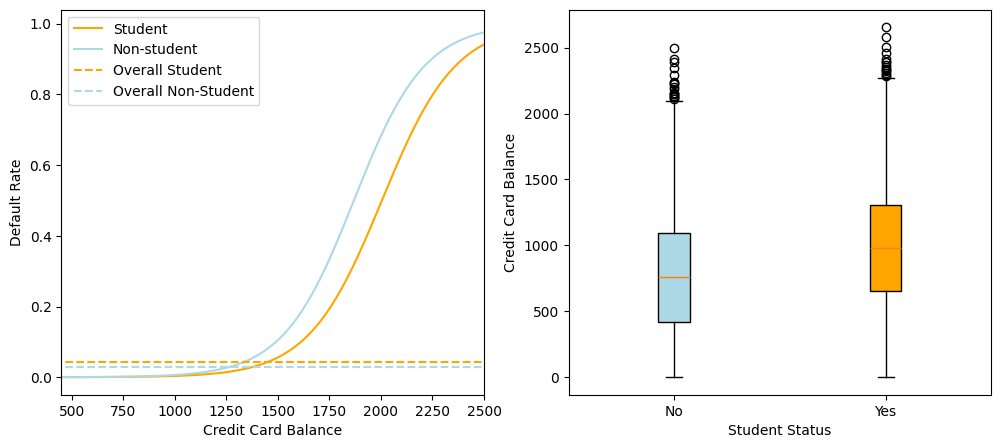

In [23]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

# Left plot
ax1.plot(test_balance, pred_stud_yes, color='orange', label='Student')
ax1.plot(test_balance, pred_stud_no, color='lightblue', label='Non-student')
ax1.hlines(127 / (127 + 2817), colors='orange', label='Overall Student',
           xmin=ax1.xaxis.get_data_interval()[0],
           xmax=ax1.xaxis.get_data_interval()[1], linestyles='dashed')
ax1.hlines(206/(206 + 6850), colors='lightblue', label='Overall Non-Student',
           xmin=ax1.xaxis.get_data_interval()[0],
           xmax=ax1.xaxis.get_data_interval()[1], linestyles='dashed')
ax1.set_ylabel('Default Rate')
ax1.set_xlabel('Credit Card Balance')
ax1.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.])
ax1.set_xlim(450,2500)
ax1.legend(loc=2)
bplot = ax2.boxplot([df2['balance'],df1['balance']], labels=['No', 'Yes'], patch_artist=True)
# fill with colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
ax2.set_xlabel('Student Status')
ax2.set_ylabel('Credit Card Balance')

## Solid lines display default rate as a function of balance
## the horizontal broken lines display the overall default rates

## Confounding Effect 
`A confounder is a variable that influences both the dependent variable and independent variable, causing a spurious association`

In [ ]:
### Predict probablity for a student/non-student when balance = 1500$, income = $40K

## Multinomial Logistic Regression  
- We sometimes wish to classify a response variable that has more than two classes
- For example medical condition in the emergency room: stroke, drug overdose, epileptic seizure or digit classification
- Multinomial logistic regression is when number of classes K > 2
- $Pr(Y = k|X = x) = \frac{e^{β_{k0}+β_{k1}x_1+···+β_{kp}x_p}}{1 + \Sigma^{K-1}_{l = 1}e^{β_{l0}+β_{l1}x_1+···+β_{lp}x_p}}$ for k = 1, 2, ..., K-1 and
  $Pr(Y = K|X = x) = \frac{1}{1 + \Sigma^{K-1}_{l = 1}e^{β_{l0}+β_{l1}x_1+···+β_{lp}x_p}}$
- Also $log(\frac{Pr(Y = k|X = x)}{Pr(Y = K|X = x)}) = β_{k0}+β_{k1}x_1+···+β_{kp}x_p$
- $K^{th}$ class is kept as baseline and it is unimportant which classes is taken as baseline as the final fitted values(predictions) and log odds will remain the same.
- k will be the predicted class if $P(Y = k | X = x)$ is maximum
- Alternative coding is to use Softmax function
  $Pr(Y = k|X = x) = \frac{e^{β_{k0}+β_{k1}x_1+···+β_{kp}x_p}}{ \Sigma^{K}_{l = 1}e^{β_{l0}+β_{l1}x_1+···+β_{lp}x_p}}$

## Question 1
This problem has to do with odds.
(a) On average, what fraction of people with an odds of 0.37 of
defaulting on their credit card payment will in fact default?
(b) Suppose that an individual has a 16% chance of defaulting on
her credit card payment. What are the odds that she will default?

## Question 2
we collect data for a group of students in a statistics class with variables $X_1$ = hours studied, $X_2$= undergrad GPA, and Y= receive an A. We fit a logistic regression and produce estimated coefficient, $\hat{β0}$=−6, $\hat{β1}$=0.05, $\hat{β2}$=1
Estimate the probability that a student who studies for 40h and has an undergrad GPA of 3.5 gets an A in the class.
